In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
%matplotlib inline

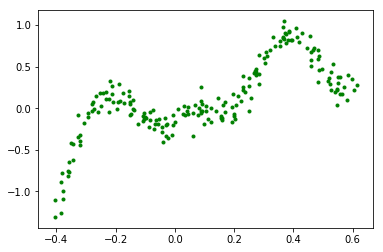

In [2]:
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [3]:
## defining the model
n_hidden = 20
n_prob_hid = 40
optimizer = tnn.Adam(learning_rate=0.001)

layer1prob = tnn.NonLinearLayer(1, n_prob_hid, activation=tnn.Relu(), optimizer=optimizer)
layer2prob = tnn.NonLinearLayer(n_prob_hid, n_hidden, activation=tnn.Softmax(), optimizer=optimizer)

layer1reg = tnn.LinearLayer(1, n_hidden, optimizer=optimizer)
layer2 = tnn.LinearLayer(n_hidden, 1, optimizer=optimizer)

_______________________
epoch 0
Loss 0.09535944304737867

_______________________
epoch 100
Loss 0.07769782445875473

_______________________
epoch 200
Loss 0.05757819438823592

_______________________
epoch 300
Loss 0.05105586543696531

_______________________
epoch 400
Loss 0.06186492010219268

_______________________
epoch 500
Loss 0.05610307401742553

_______________________
epoch 600
Loss 0.05507536908618917

_______________________
epoch 700
Loss 0.054642079411597225

_______________________
epoch 800
Loss 0.05304319543658876

_______________________
epoch 900
Loss 0.04935535631353354

_______________________
epoch 1000
Loss 0.04565012097785141

_______________________
epoch 1100
Loss 0.04323926482729755

_______________________
epoch 1200
Loss 0.04127646997952184

_______________________
epoch 1300
Loss 0.03472006758608073

_______________________
epoch 1400
Loss 0.03190941154734705

_______________________
epoch 1500
Loss 0.030639761146536087

_______________________
epoch 1600

TclError: invalid command name "pyimage12"

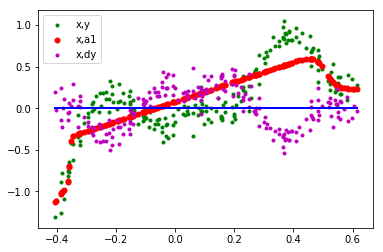

In [4]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    probs = layer2prob.forward(layer1prob.forward(xx))
    
    regs = layer1reg.forward(xx)
    a1 = probs*regs
    y_out = layer2.forward(a1)
#     y_out = a1.sum(axis=1, keepdims=True)

    loss = tnn.MseLoss.loss(y_out, yy)
    dy = tnn.MseLoss.del_loss(y_out, yy)
    
    da1 = layer2.backward(dy)
#     da1 = np.hstack([dy]*n_hidden)
    dxp = layer1prob.backward(layer2prob.backward(da1))
    dxr = layer1reg.backward(da1)
    dx = dxp + dxr
    
    layer1prob.update()
    layer2prob.update()
    layer1reg.update()
    layer2.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, y_out.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
#         plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

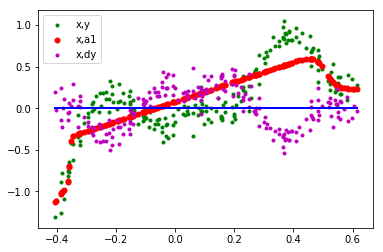

In [5]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, y_out.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)
plt.legend()

In [6]:
layer2prob.output.max(axis=1)

array([1.        , 0.99991775, 0.9999978 , 0.99996624, 0.96154428,
       1.        , 0.99999903, 0.99998337, 0.99999506, 0.98893934,
       0.67320207, 0.99998757, 0.99999168, 0.94946267, 0.64311783,
       0.99400824, 0.99999105, 0.8854338 , 0.99999193, 0.99999808,
       0.99999681, 0.99999654, 0.99999478, 0.9999979 , 0.99999864,
       0.99999828, 0.99999915, 0.99999958, 0.99999799, 0.99999972,
       0.999999  , 0.99999928, 0.99999971, 0.99999939, 0.99999969,
       0.99999978, 0.99999979, 0.99999959, 0.9999999 , 0.99999981,
       0.99999995, 0.99999994, 0.99999988, 0.99999991, 0.99999991,
       0.99999997, 0.99999997, 0.99999997, 0.99999997, 0.99999998,
       0.99999998, 0.99999998, 0.99999997, 0.99999999, 0.99999998,
       0.99999999, 0.99999999, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [7]:
layer2prob.output.argmax(axis=1)

array([18, 18, 18, 18, 18, 18, 18,  7, 18,  7, 18,  7,  7, 18, 18,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  9,  7,  7,  9,  9,  7,  7,  9,  7,  7,  9,  7,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9])